In [24]:
folder = 'taskB-graphs'
!rm -rf $folder
!mkdir $folder

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('results.csv')

newReno =  df.loc[(df['Algo'] == 'TcpNewReno')]
lrNewReno =  df.loc[(df['Algo'] == 'TcpLrNewReno')]
vegas =  df.loc[(df['Algo'] == 'TcpVegas')]

df.head()

,Algo,Nodes,Error Rate,Throughput,End to End Delay,Delivery Ratio,Drop Ratio
0,TcpLrNewReno,1,8,11.47,22185,91.83,8.17
1,TcpNewReno,1,0,36.51,32994,93.98,6.02
2,TcpNewReno,1,4,24.53,31030,92.40,7.60
3,TcpLrNewReno,1,6,15.03,23595,92.32,7.68
4,TcpNewReno,4,8,6.88,834586,42.99,57.01


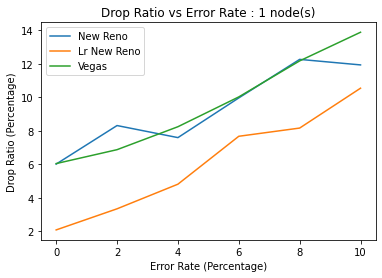

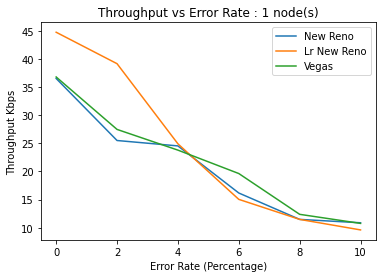

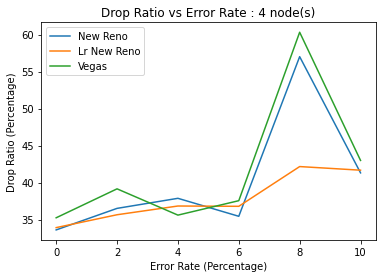

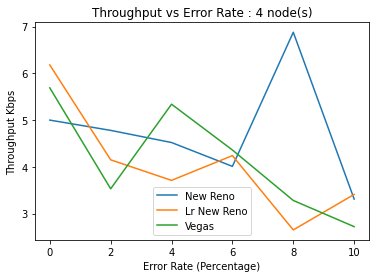

In [26]:
for n in [1, 4]:
    nr = newReno.loc[df['Nodes']==n].sort_values('Error Rate')
    lnr = lrNewReno.loc[df['Nodes']==n].sort_values('Error Rate')
    v = vegas.loc[df['Nodes']==n].sort_values('Error Rate')

    plt.plot(nr['Error Rate'], nr['Drop Ratio'], label="New Reno")
    plt.plot(lnr['Error Rate'], lnr['Drop Ratio'], label="Lr New Reno")
    plt.plot(v['Error Rate'], v['Drop Ratio'], label="Vegas")
    plt.xlabel("Error Rate (Percentage)")
    plt.ylabel("Drop Ratio (Percentage)")
    plt.legend()
    plt.title("Drop Ratio vs Error Rate : "+str(n)+" node(s)")
    plt.savefig(folder+"/Drop Ratio vs Error Rate "+str(n)+" nodes.png", dpi=1200)
    plt.show()
    print("")

    plt.plot(nr['Error Rate'], nr['Throughput'], label="New Reno")
    plt.plot(lnr['Error Rate'], lnr['Throughput'], label="Lr New Reno")
    plt.plot(v['Error Rate'], v['Throughput'], label="Vegas")
    plt.xlabel("Error Rate (Percentage)")
    plt.ylabel("Throughput Kbps")
    plt.legend()
    plt.title("Throughput vs Error Rate : "+str(n)+" node(s)")
    plt.savefig(folder+"/Throughput vs Error Rate "+str(n)+" nodes.png", dpi=1200)
    plt.show()
    print("")

In [27]:
import shutil
shutil.make_archive(folder, 'zip', folder)

'/content/taskB-graphs.zip'